In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

2023-06-16 16:28:12.841628: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-16 16:28:12.843758: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 16:28:12.887872: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 16:28:12.888788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 16:28:13.622536: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# 시드 설정
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [22]:
def plot_graph(x, y, x_hat, y_hat):
    fig = plt.figure(figsize=(8,6))
    
    plt.plot(x,y,marker='o')
    plt.plot(x_hat,y_hat)

In [4]:
x_0 = tf.random.normal([20], 3, 1)
y_0 = tf.zeros(20)
x_1 = tf.random.normal([20], 5.5, 1)
y_1 = tf.ones(20)

x = tf.concat([x_0, x_1], 0)
y = tf.concat([y_0, y_1], 0)

print(x.shape)
print(y.shape)
print(x)
print(y)

(40,)
(40,)
tf.Tensor(
[1.8987797 4.5457516 3.383644  2.1203423 1.7753278 2.018879  3.087808
 2.7967396 2.4418437 2.279456  2.3740077 2.284974  2.6516457 2.66353
 3.1825757 4.1085954 4.279659  2.9785242 2.6803112 3.3733256 5.903088
 4.411979  5.4369044 6.8365564 6.21176   5.0107136 4.735779  4.4627514
 4.248066  5.5212245 4.948624  3.7568302 5.164639  4.4573326 6.509138
 6.7362537 4.816311  6.173609  5.079377  4.4586973], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


2023-06-16 16:28:17.252796: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
def cross_entropy(x, y, w, b):
    y_pred = tf.sigmoid(x*w + b) #a
    return -tf.reduce_sum(y*tf.math.log(y_pred) + (1-y)*(tf.math.log(1-y_pred)))

def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    N = tf.shape(x)[0]
    for i in range(0,N):
        x_i = x[i]
        y_i = y[i]
        y_pred = tf.sigmoid(x_i*w + b)
        
        dL_df1 = -(y_i - y_pred)/(y_pred*(1-y_pred))
        dL_df2 = y_pred * (1-y_pred)
        
        b_gradient += dL_df1*dL_df2*1
        w_gradient += dL_df1*dL_df2*x_i
    
    return[w_gradient, b_gradient]

In [18]:
def apply_gradient(gradients,parameters,learning_rate):
    [w_g, b_g] = gradients
    [w,b] = parameters
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    return [w,b]

In [19]:
def run_opt(x,y,w,b,learning_rate):
    gradient = cal_gradient(x,y,w,b)
    return apply_gradient(gradient, [w,b], learning_rate)

In [20]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

learning_rate = 0.005
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x,y,w,b,learning_rate)
    w = w_new
    b = b_new
    
    if step%display_step == 0:
        loss = cross_entropy(x,y,w,b)
        print("step:", step, ", loss:", loss.numpy(), ", w:", w.numpy(), ",b:", b.numpy())

step: 0 , loss: 36.833336 , w: [0.73164576] ,b: [-0.4865215]
step: 200 , loss: 13.590852 , w: [0.9502844] ,b: [-3.536779]
step: 400 , loss: 10.98228 , w: [1.3235271] ,b: [-5.0938125]
step: 600 , loss: 9.806002 , w: [1.5758843] ,b: [-6.1442347]
step: 800 , loss: 9.139129 , w: [1.7659428] ,b: [-6.936599]
step: 1000 , loss: 8.710689 , w: [1.9180769] ,b: [-7.572296]
step: 1200 , loss: 8.413015 , w: [2.0446718] ,b: [-8.102467]
step: 1400 , loss: 8.194823 , w: [2.152874] ,b: [-8.556543]
step: 1600 , loss: 8.0285635 , w: [2.2471771] ,b: [-8.953021]
step: 1800 , loss: 7.898092 , w: [2.3305962] ,b: [-9.30431]


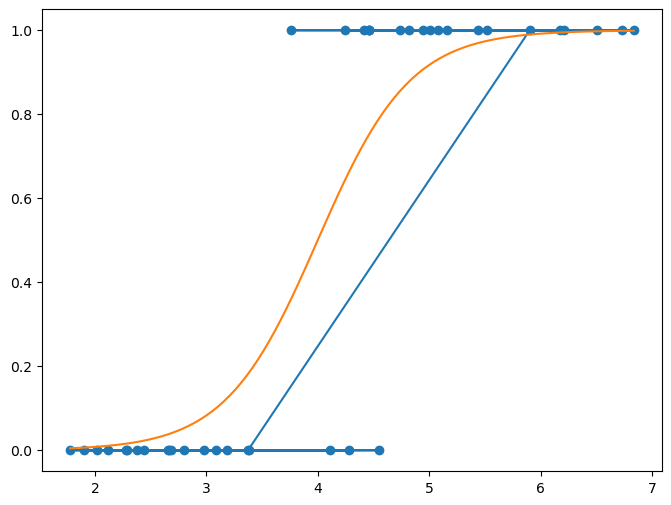

In [29]:
x_fl = np.linspace(np.min(x), np.max(x),100)
plot_graph(x,y,x_f1,tf.sigmoid(w*x_fl+b))

In [32]:
#dataset load
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32) #float32로 데이터 타입 변경(원래는 int)
num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2] # 28 *28 = 784

# -1은 원래 SHAPE에서 다른 값으로 나눴을 때의 값을 넣어라! 라는 뜻 -> 원래는 shape / 784의 값이 들어가겠죠
x_train, x_test = tf.reshape(x_train, [-1, num_features]), tf.reshape(x_test, [-1, num_features])
x_train, x_test = x_train/255., x_test/255.                           

In [34]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [36]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10)
    ]
)

In [39]:
model.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# 어떤 optimizer, 어떤 loss, 어떤 metric을 사용해서 학습할 것인지 넣어줌!!!!!!!!
result = model.fit(x_train, y_train, batch_size = 128, epochs = 40)

Epoch 1/40
469/469 [==============================] - 3s 6ms/step - loss: 1.2942 - accuracy: 0.6928
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.5049 - accuracy: 0.8695
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3873 - accuracy: 0.8935
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3418 - accuracy: 0.9030
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3143 - accuracy: 0.9098
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2945 - accuracy: 0.9155
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2781 - accuracy: 0.9194
Epoch 8/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2643 - accuracy: 0.9242
Epoch 9/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2522 - accuracy: 0.9279
Epoch 10/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2411 - accuracy: 0.9310

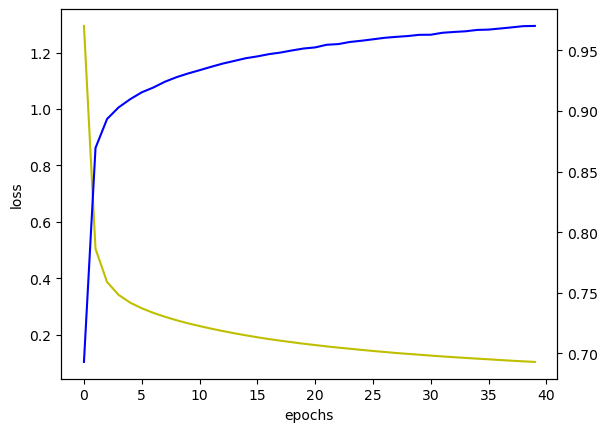

In [41]:
fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(result.history['loss'], 'y', label = 'train loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax.plot(result.history['accuracy'], 'b', label='train acc')
plt.show()

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9658
0.11529023200273514
0.9657999873161316
